In [118]:
accidents = read.csv(file = "../../data/Accident_Information_London_C.csv",
                     header = TRUE,
                     sep = ",",
stringsAsFactors = FALSE)

In [137]:
data2 = read.csv(file = "/home/tanvi/Downloads/1-6m-accidents-traffic-flow-over-16-years/accidents_2005_to_2007.csv",
                     header = TRUE,
                     sep = ",",
stringsAsFactors = FALSE)

In [140]:
library(plyr)
mergedata <- join(x=accidents, y=data2, by = "Accident_Index")

In [189]:
#head(mergedata)

In [119]:
colnames(accidents)
lapply(accidents, class)

[1] "Accident_Index"                         
 [2] "Accident_Severity"                      
 [3] "Date"                                   
 [4] "Day_of_Week"                            
 [5] "Light_Conditions"                       
 [6] "Number_of_Casualties"                   
 [7] "Number_of_Vehicles"                     
 [8] "Pedestrian_Crossing_Human_Control"      
 [9] "Pedestrian_Crossing_Physical_Facilities"
[10] "Police_Force"                           
[11] "Road_Surface_Conditions"                
[12] "Road_Type"                              
[13] "Special_Conditions_at_Site"             
[14] "Speed_limit"                            
[15] "Time"                                   
[16] "Urban_or_Rural_Area"                    
[17] "Weather_Conditions"                     
[18] "Year"

$Accident_Index
[1] "character"

$Accident_Severity
[1] "character"

$Date
[1] "character"

$Day_of_Week
[1] "character"

$Light_Conditions
[1] "character"

$Number_of_Casualties
[1] "integer"

$Number_of_Vehicles
[1] "integer"

$Pedestrian_Crossing_Human_Control
[1] "integer"

$Pedestrian_Crossing_Physical_Facilities
[1] "integer"

$Police_Force
[1] "character"

$Road_Surface_Conditions
[1] "character"

$Road_Type
[1] "character"

$Special_Conditions_at_Site
[1] "character"

$Speed_limit
[1] "integer"

$Time
[1] "character"

$Urban_or_Rural_Area
[1] "character"

$Weather_Conditions
[1] "character"

$Year
[1] "integer"

In [120]:
nrow(accidents)

[1] 4084

In [121]:
a = accidents
unique(accidents$Accident_Severity)
a$Accident_Severity = factor(accidents$Accident_Severity, levels = c("Slight", "Serious", "Fatal"),
                             labels = c("Slight", "Serious", "Fatal"))
unique(a$Accident_Severity)

[1] "Slight"  "Serious" "Fatal"

[1] Slight  Serious Fatal  
Levels: Slight Serious Fatal

In [122]:
#transform Date into 4 seasons
#unique(accidents$Date)
a$Date = sapply(strsplit(accidents$Date,"-"),
                function(x) {
                  x <- as.numeric(x)
                  x[2]
                }
)
a$Date = factor(a$Date, levels = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
                labels = c("Winter", "Winter", "Spring", "Spring", "Spring", "Summer", "Summer", "Summer", "Autumn", "Autumn", "Autumn", "Winter"))
unique(a$Date)


[1] Winter Spring Summer Autumn
Levels: Winter Spring Summer Autumn

In [123]:
unique(accidents$Day_of_Week)
a$Day_of_Week = factor(accidents$Day_of_Week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"),
                       labels = c("Weekday", "Weekday", "Weekday", "Weekday", "Weekday", "Weekend", "Weekend")) #labels = c(1, 2, 3, 4, 5, 6, 7))
unique(a$Day_of_Week)

[1] "Saturday"  "Sunday"    "Tuesday"   "Friday"    "Monday"    "Wednesday"
[7] "Thursday"

[1] Weekend Weekday
Levels: Weekday Weekend

In [124]:
#transform Light_Conditions into daylight and darkness
unique(accidents$Light_Conditions)
a$Light_Conditions = factor(accidents$Light_Conditions, levels = c("Daylight", "Darkness - lights lit", "Darkness - lighting unknown", "Darkness - lights unlit"),
                            #labels = c("Daylight", "Darkness", "Darkness", "Darkness")) #labels = c(1, 2, 3, 4))
                            labels = c("Daylight", "Darkness - lights lit", "Darkness - lighting unknown", "Darkness - lights unlit")) #labels = c(1, 2, 3, 4))
unique(a$Light_Conditions)

[1] "Darkness - lights lit"       "Daylight"                   
[3] "Darkness - lights unlit"     "Darkness - lighting unknown"

[1] Darkness - lights lit       Daylight                   
[3] Darkness - lights unlit     Darkness - lighting unknown
4 Levels: Daylight Darkness - lights lit ... Darkness - lights unlit

In [125]:
unique(accidents$Road_Surface_Conditions)
a$Road_Surface_Conditions = factor(accidents$Road_Surface_Conditions, levels = c("Data missing or out of range", "Dry", "Wet or damp", "Frost or ice", "Snow"),
                                   labels = c("Data missing or out of range", "Dry", "Wet or damp", "Frost or ice", "Snow"))
unique(a$Road_Surface_Conditions)


[1] "Dry"                          "Wet or damp"                 
[3] "Frost or ice"                 "Snow"                        
[5] "Data missing or out of range"

[1] Dry                          Wet or damp                 
[3] Frost or ice                 Snow                        
[5] Data missing or out of range
Levels: Data missing or out of range Dry Wet or damp Frost or ice Snow

In [126]:
unique(accidents$Road_Type)
a$Road_Type = factor(accidents$Road_Type, levels = c("Unknown", "Single carriageway", "Dual carriageway", "One way street", "Roundabout", "Slip road"),
                     labels = c("Unknown", "Single carriageway", "Dual carriageway", "One way street", "Roundabout", "Slip road")) 
unique(a$Road_Type)

[1] "Single carriageway" "One way street"     "Dual carriageway"  
[4] "Roundabout"         "Slip road"          "Unknown"

[1] Single carriageway One way street     Dual carriageway   Roundabout        
[5] Slip road          Unknown           
6 Levels: Unknown Single carriageway Dual carriageway ... Slip road

In [127]:
#transform Special_Conditions_at_Site into none and special
unique(accidents$Special_Conditions_at_Site)
a$Special_Conditions_at_Site = factor(accidents$Special_Conditions_at_Site, levels = c("Data missing or out of range", "None", "Road surface defective", "Roadworks", "Auto traffic signal - out", "Oil or diesel", "Auto signal part defective", "Road sign or marking defective or obscured"),
                                      labels = c("None", "None","Special", "Special", "Special", "Special", "Special", "Special")) #labels = c(0, 1, 2, 3, 4, 5, 6, 7))
unique(a$Special_Conditions_at_Site)

[1] "None"                                      
[2] "Road surface defective"                    
[3] "Roadworks"                                 
[4] "Auto traffic signal - out"                 
[5] "Oil or diesel"                             
[6] "Auto signal part defective"                
[7] "Road sign or marking defective or obscured"
[8] "Data missing or out of range"

[1] None    Special
Levels: None Special

In [128]:
unique(accidents$Time)
a$Time = sapply(strsplit(accidents$Time,":"),
                function(x) {
                  x <- as.numeric(x)
                  x[1]+x[2]/60
                }
)
# Midnight - 6am = Night; 6am - Noon = Morning; Noon - 6pm = afternoon; 6pm - Midnight = evening
a$Time = cut(a$Time, breaks=4, labels=c("Night", "Morning", "Afternoon", "Evening"))
unique(a$Time)

[1] "22:50:00" "20:50:00" "10:02:00" "02:45:00" "12:30:00" "18:05:00"
   [7] "10:00:00" "15:00:00" "11:59:00" "14:22:00" "12:25:00" "07:30:00"
  [13] "00:30:00" "14:35:00" "17:45:00" "22:30:00" "15:30:00" "04:52:00"
  [19] "23:20:00" "16:00:00" "18:50:00" "08:25:00" "16:20:00" "21:00:00"
  [25] "13:05:00" "08:30:00" "09:20:00" "11:15:00" "19:05:00" "07:25:00"
  [31] "11:40:00" "15:10:00" "13:31:00" "13:00:00" "15:45:00" "10:05:00"
  [37] "22:26:00" "15:15:00" "21:15:00" "18:00:00" "10:41:00" "17:00:00"
  [43] "11:26:00" "06:35:00" "07:13:00" "09:45:00" "19:30:00" "07:15:00"
  [49] "17:15:00" "12:05:00" "10:59:00" "18:15:00" "06:58:00" "16:52:00"
  [55] "14:30:00" "16:55:00" "14:00:00" "15:33:00" "08:40:00" "06:50:00"
  [61] "13:30:00" "09:05:00" "12:55:00" "13:45:00" "09:55:00" "14:45:00"
  [67] "15:40:00" "16:17:00" "09:08:00" "12:26:00" "22:10:00" "08:50:00"
  [73] "09:00:00" "18:30:00" "18:57:00" "12:50:00" "16:50:00" "16:28:00"
  [79] "13:40:00" "04:07:00" "07:50:00" "17:50:00" "23:37:00" "08:45:00"
  [85] "18:10:00" "16:26:00" "23:45:00" "00:40:00" "13:44:00" "00:04:00"
  [91] "17:20:00" "17:10:00" "17:29:00" "13:46:00" "08:00:00" "13:15:00"
  [97] "22:37:00" "10:35:00" "13:52:00" "16:29:00" "23:00:00" "08:36:00"
 [103] "13:35:00" "15:05:00" "17:25:00" "11:22:00" "16:40:00" "11:20:00"
 [109] "11:00:00" "11:05:00" "21:09:00" "09:35:00" "00:33:00" "17:40:00"
 [115] "07:55:00" "09:57:00" "16:46:00" "19:23:00" "10:15:00" "10:45:00"
 [121] "14:39:00" "09:50:00" "14:15:00" "20:20:00" "08:55:00" "09:22:00"
 [127] "09:52:00" "14:40:00" "12:40:00" "06:40:00" "18:20:00" "11:34:00"
 [133] "01:00:00" "04:40:00" "12:58:00" "18:21:00" "22:36:00" "22:07:00"
 [139] "20:56:00" "08:27:00" "18:27:00" "13:21:00" "10:22:00" "18:45:00"
 [145] "08:05:00" "23:33:00" "10:30:00" "18:22:00" "03:40:00" "07:03:00"
 [151] "15:35:00" "20:34:00" "22:11:00" "18:35:00" "14:08:00" "16:45:00"
 [157] "16:32:00" "17:33:00" "10:39:00" "18:31:00" "17:17:00" "08:43:00"
 [163] "17:23:00" "19:40:00" "21:17:00" "15:53:00" "06:25:00" "10:01:00"
 [169] "13:50:00" "16:30:00" "21:25:00" "18:25:00" "19:15:00" "22:31:00"
 [175] "08:35:00" "14:05:00" "11:52:00" "13:39:00" "12:04:00" "09:32:00"
 [181] "22:20:00" "14:31:00" "15:25:00" "01:21:00" "21:45:00" "09:14:00"
 [187] "08:26:00" "07:10:00" "23:15:00" "09:02:00" "17:55:00" "00:10:00"
 [193] "09:15:00" "07:21:00" "14:20:00" "05:05:00" "16:39:00" "10:55:00"
 [199] "21:42:00" "23:30:00" "08:20:00" "12:00:00" "07:35:00" "13:02:00"
 [205] "00:15:00" "02:50:00" "02:38:00" "20:38:00" "15:50:00" "16:41:00"
 [211] "09:30:00" "19:18:00" "13:10:00" "13:25:00" "21:30:00" "16:15:00"
 [217] "17:41:00" "18:13:00" "09:21:00" "18:55:00" "15:26:00" "03:28:00"
 [223] "19:00:00" "17:59:00" "13:59:00" "00:52:00" "09:06:00" "22:00:00"
 [229] "20:05:00" "07:53:00" "10:07:00" "20:10:00" "06:10:00" "19:50:00"
 [235] "16:25:00" "19:24:00" "15:34:00" "23:12:00" "14:25:00" "16:35:00"
 [241] "13:20:00" "21:55:00" "12:22:00" "10:13:00" "09:44:00" "12:54:00"
 [247] "22:15:00" "20:30:00" "23:53:00" "03:30:00" "08:49:00" "15:22:00"
 [253] "17:30:00" "11:30:00" "06:52:00" "18:01:00" "12:07:00" "18:08:00"
 [259] "11:25:00" "18:24:00" "22:54:00" "06:45:00" "15:29:00" "17:24:00"
 [265] "14:11:00" "08:10:00" "09:33:00" "08:24:00" "16:43:00" "12:15:00"
 [271] "23:59:00" "19:43:00" "07:56:00" "19:47:00" "15:03:00" "20:00:00"
 [277] "16:54:00" "01:26:00" "01:57:00" "09:25:00" "14:28:00" "04:38:00"
 [283] "22:02:00" "04:45:00" "07:05:00" "14:50:00" "09:39:00" "08:29:00"
 [289] "09:11:00" "10:50:00" "10:10:00" "22:46:00" "01:20:00" "09:40:00"
 [295] "02:59:00" "05:06:00" "14:23:00" "02:35:00" "23:49:00" "11:57:00"
 [301] "21:07:00" "20:02:00" "12:52:00" "11:07:00" "23:40:00" "13:24:00"
 [307] "23:35:00" "19:20:00" "05:55:00" "09:01:00" "13:58:00" "19:12:00"
 [313] "04:30:00" "16:19:00" "13:32:00" "13:55:00" "15:42:00" "14:10:00"
 [319] "21:20:00" "22:40:00" "10:23:00" "08:21:00" "08:15:00" "10:04:00"
 [325] "07:31:00" "16:49:00" "01:48:00" "10:51:00" "08:08:00"

[1] Evening   Morning   Night     Afternoon
Levels: Night Morning Afternoon Evening

In [129]:
head(a)

Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
200501CP00001,Slight,Winter,Weekend,Darkness - lights lit,1,2,0,5,City of London,Dry,Single carriageway,None,30,Evening,Urban,Fine no high winds,2005
200501CP00002,Slight,Winter,Weekend,Darkness - lights lit,1,2,0,0,City of London,Dry,Single carriageway,None,30,Evening,Urban,Fine no high winds,2005
200501CP00003,Slight,Winter,Weekend,Daylight,1,3,0,5,City of London,Dry,Single carriageway,None,30,Morning,Urban,Fine no high winds,2005
200501CP00004,Slight,Winter,Weekend,Darkness - lights lit,3,2,0,5,City of London,Wet or damp,One way street,None,30,Night,Urban,Raining no high winds,2005
200501CP00005,Slight,Winter,Weekday,Daylight,1,1,0,5,City of London,Dry,Dual carriageway,None,30,Afternoon,Urban,Fine no high winds,2005
200501CP00006,Serious,Winter,Weekday,Darkness - lights lit,1,2,0,5,City of London,Dry,Roundabout,None,30,Evening,Urban,Fine no high winds,2005


In [130]:
unique(accidents$Weather_Conditions)
a$Weather_Conditions = factor(accidents$Weather_Conditions, levels = c("Unknown", "Other", "Fine no high winds", "Fine + high winds", "Raining no high winds", "Raining + high winds", "Snowing no high winds", "Fog or mist"),
                              labels = c("Unknown", "Unknown", "Fine", "Fine", "Bad", "Bad", "Bad", "Bad")) #labels = c(0, 1, 2, 3, 4, 5, 6, 7))
unique(a$Weather_Conditions)

[1] "Fine no high winds"    "Raining no high winds" "Snowing no high winds"
[4] "Other"                 "Unknown"               "Raining + high winds" 
[7] "Fine + high winds"     "Fog or mist"

[1] Fine    Bad     Unknown
Levels: Unknown Fine Bad

In [131]:
#select subset
b = subset(a, select = c(3, 4, 5, 7, 11, 12, 13, 15, 17))
head(b)

Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Time,Weather_Conditions
Winter,Weekend,Darkness - lights lit,2,Dry,Single carriageway,None,Evening,Fine
Winter,Weekend,Darkness - lights lit,2,Dry,Single carriageway,None,Evening,Fine
Winter,Weekend,Daylight,3,Dry,Single carriageway,None,Morning,Fine
Winter,Weekend,Darkness - lights lit,2,Wet or damp,One way street,None,Night,Bad
Winter,Weekday,Daylight,1,Dry,Dual carriageway,None,Afternoon,Fine
Winter,Weekday,Darkness - lights lit,2,Dry,Roundabout,None,Evening,Fine


In [132]:

library(dplyr)
library(cluster)
library(ggplot2) 


#compute the distance matrix using ‘gower’
gower_dist <- daisy(b[, -1], metric = "gower", type = list(logratio = 3))
summary(gower_dist)
gower_mat <- as.matrix(gower_dist)

8337486 dissimilarities, summarized :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1734  0.2984  0.3001  0.4234  1.0000 
Metric :  mixed ;  Types = N, N, I, N, N, N, N, N 
Number of objects : 4084

In [17]:
# number of cluster PAM
sil <- c(NA)
for(i in 2:10){
  pam_fit <- pam(gower_mat, diss=TRUE, k=i)
  sil[i] <-pam_fit$silinfo$avg.width
}

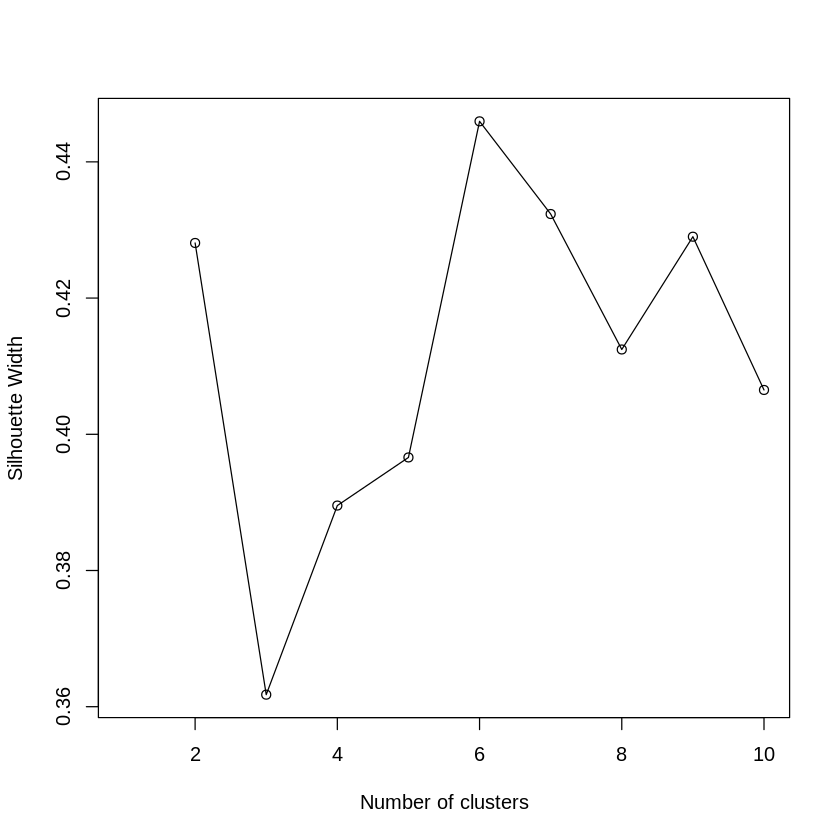

In [18]:
plot(1:10, sil,
     xlab = "Number of clusters",
     ylab = "Silhouette Width")
lines(1:10, sil)

In [25]:
#Cluster Interpretation k=6
pam_fit <- pam(gower_dist, diss = TRUE, k = 6)



In [20]:
library(cluster)
#Cluster Interpretation k = 7
pam_fit_7 <- pam(gower_dist, diss = TRUE, k = 7)


In [21]:
#Cluster Interpretation k = 5
pam_fit_5 <- pam(gower_dist, diss = TRUE, k = 5)

In [190]:
#plot for k=7
#clusplot(pam_fit_7, main = "Cluster plot, k = 7", 
#         color = TRUE)

In [23]:
head(pam_fit$cluster)

1 2 3 4 5 6 
1 1 2 3 4 1

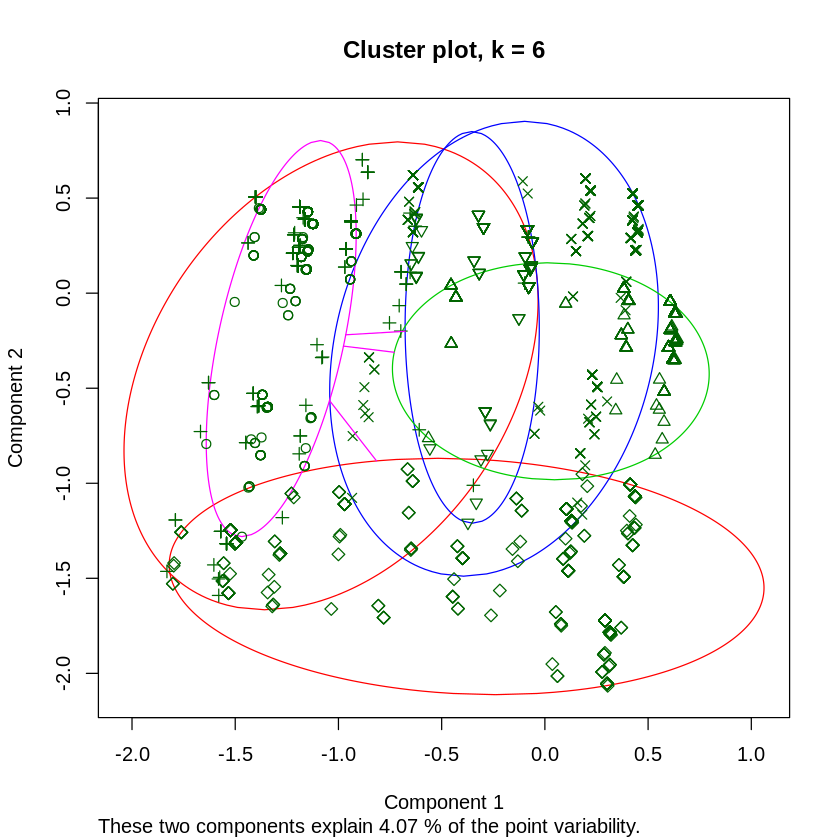

In [24]:
clusplot(pam_fit, main = "Cluster plot, k = 6", 
         color = TRUE)

In [25]:
c <- data.frame(b, pam_fit$cluster)

pam_results <- b %>%
  mutate(cluster = pam_fit$clustering) %>%
  group_by(cluster) %>%
  do(the_summary = summary(.))
pam_results$the_summary


[[1]]
     Date      Day_of_Week                     Light_Conditions
 Winter:182   Weekday:531   Daylight                   :  0    
 Spring:114   Weekend: 55   Darkness - lights lit      :586    
 Summer: 82                 Darkness - lighting unknown:  0    
 Autumn:208                 Darkness - lights unlit    :  0    
                                                               
                                                               
 Number_of_Vehicles                 Road_Surface_Conditions
 Min.   :1.00       Data missing or out of range:  0       
 1st Qu.:1.00       Dry                         :524       
 Median :2.00       Wet or damp                 : 57       
 Mean   :1.72       Frost or ice                :  4       
 3rd Qu.:2.00       Snow                        :  1       
 Max.   :5.00                                              
              Road_Type          Time     Weather_Conditions    cluster 
 Unknown           :  0   Night    : 72   Unknown: 12

In [26]:
#Output medoids
b[pam_fit$medoids, ]

,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Time,Weather_Conditions
4082,Winter,Weekday,Darkness - lights lit,2,Dry,Single carriageway,Evening,Fine
4079,Winter,Weekday,Daylight,2,Dry,Single carriageway,Morning,Fine
4002,Autumn,Weekend,Darkness - lights lit,1,Dry,Single carriageway,Night,Fine
26,Winter,Weekday,Daylight,2,Dry,Single carriageway,Afternoon,Fine
4034,Autumn,Weekday,Daylight,2,Wet or damp,Single carriageway,Morning,Bad
4005,Autumn,Weekday,Daylight,2,Dry,Single carriageway,Evening,Fine


In [191]:
#b[pam_fit$cluster]

In [28]:
install.packages("Rtsne")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [29]:
library(Rtsne)
# Cluster Visualization #
#########################
tsne_obj <- Rtsne(gower_dist, is_distance = TRUE)


X,Y,cluster,id
36.942195,-3.930313,1,200501CP00001
36.942355,-3.929143,1,200501CP00002
5.393937,-41.785446,2,200501CP00003
-1.542110,-9.967635,3,200501CP00004
21.026161,1.527901,4,200501CP00005
13.045151,-11.979790,1,200501CP00006


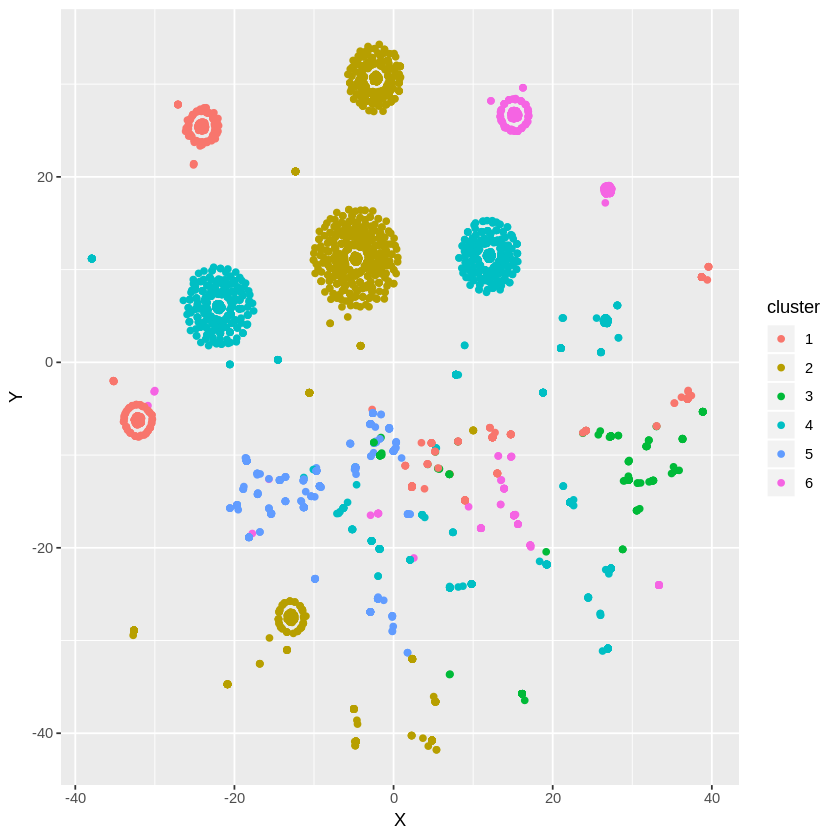

In [30]:
#visualize clusters for k=6
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering),
         id = a$Accident_Index)

head(tsne_data)
colnames(tsne_data)[3] = "cluster"

ggplot(aes(x = X, y = Y), data = tsne_data) + geom_point(aes(color = cluster))

In [192]:
##Visualization for 7 clusters
#tsne_data <- tsne_obj$Y %>%
#  data.frame() %>%
#  setNames(c("X", "Y")) %>%
#  mutate(cluster = factor(pam_fit_7$clustering),
#         id = a$Accident_Index)

#head(tsne_data)
#colnames(tsne_data)[3] = "cluster"

#ggplot(aes(x = X, y = Y), data = tsne_data) + geom_point(aes(color = cluster))

In [193]:
#visualize clusters for k=5
#tsne_data <- tsne_obj$Y %>%
#  data.frame() %>%
#  setNames(c("X", "Y")) %>%
#  mutate(cluster = factor(pam_fit_5$clustering),
#         id = a$Accident_Index)

#head(tsne_data)
#colnames(tsne_data)[3] = "cluster"

#ggplot(aes(x = X, y = Y), data = tsne_data) + geom_point(aes(color = cluster))

In [194]:
# examine results in each class
p1 <- which(pam_fit$clustering %in% c(1))
head(b[p1,])
p2 <- which(pam_fit$clustering %in% c(2))
head(b[p2,])
p3 <- which(pam_fit$clustering %in% c(3))
head(b[p3,])
p4 <- which(pam_fit$clustering %in% c(4))
head(b[p4,])
p5 <- which(pam_fit$clustering %in% c(5))
head(b[p5,])
p6 <- which(pam_fit$clustering %in% c(6))
head(b[p6,])

,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Time,Weather_Conditions
1,Winter,Weekend,Darkness - lights lit,2,Dry,Single carriageway,None,Evening,Fine
2,Winter,Weekend,Darkness - lights lit,2,Dry,Single carriageway,None,Evening,Fine
6,Winter,Weekday,Darkness - lights lit,2,Dry,Roundabout,None,Evening,Fine
17,Winter,Weekday,Darkness - lights lit,1,Dry,Dual carriageway,None,Evening,Fine
25,Winter,Weekday,Darkness - lights lit,1,Dry,Single carriageway,None,Evening,Fine
41,Spring,Weekday,Darkness - lights lit,2,Dry,Single carriageway,None,Evening,Fine


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Time,Weather_Conditions
3,Winter,Weekend,Daylight,3,Dry,Single carriageway,None,Morning,Fine
7,Winter,Weekday,Daylight,2,Dry,Single carriageway,None,Morning,Fine
13,Winter,Weekday,Daylight,2,Dry,Single carriageway,None,Morning,Fine
23,Winter,Weekday,Daylight,1,Dry,Single carriageway,None,Morning,Fine
27,Winter,Weekday,Daylight,1,Dry,Dual carriageway,None,Morning,Fine
29,Winter,Weekday,Daylight,2,Dry,Single carriageway,None,Morning,Fine


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Time,Weather_Conditions
4,Winter,Weekend,Darkness - lights lit,2,Wet or damp,One way street,None,Night,Bad
14,Winter,Weekend,Darkness - lights lit,2,Dry,Dual carriageway,None,Night,Fine
19,Winter,Weekday,Darkness - lights lit,1,Dry,Single carriageway,None,Night,Fine
90,Spring,Weekday,Darkness - lights lit,1,Dry,Single carriageway,None,Night,Fine
104,Summer,Weekend,Darkness - lights lit,1,Dry,One way street,None,Night,Fine
108,Summer,Weekday,Darkness - lights lit,1,Dry,Dual carriageway,None,Night,Fine


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Time,Weather_Conditions
5,Winter,Weekday,Daylight,1,Dry,Dual carriageway,None,Afternoon,Fine
11,Winter,Weekday,Daylight,1,Dry,Single carriageway,None,Afternoon,Fine
12,Winter,Weekend,Daylight,1,Dry,Single carriageway,None,Afternoon,Fine
15,Winter,Weekend,Daylight,2,Dry,Single carriageway,None,Afternoon,Fine
18,Winter,Weekday,Daylight,2,Dry,Roundabout,None,Afternoon,Fine
24,Winter,Weekend,Daylight,2,Dry,One way street,None,Afternoon,Fine


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Time,Weather_Conditions
8,Winter,Weekday,Daylight,2,Wet or damp,One way street,None,Afternoon,Bad
9,Winter,Weekday,Daylight,1,Wet or damp,Single carriageway,None,Morning,Bad
10,Winter,Weekday,Darkness - lights lit,3,Wet or damp,Single carriageway,None,Night,Bad
16,Winter,Weekday,Darkness - lights lit,1,Wet or damp,Single carriageway,None,Afternoon,Bad
20,Winter,Weekday,Darkness - lights lit,2,Wet or damp,Dual carriageway,None,Evening,Bad
21,Winter,Weekday,Daylight,1,Wet or damp,Dual carriageway,Special,Afternoon,Bad


,Date,Day_of_Week,Light_Conditions,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Time,Weather_Conditions
31,Winter,Weekday,Daylight,2,Dry,Single carriageway,None,Evening,Fine
42,Spring,Weekday,Darkness - lights unlit,1,Dry,Single carriageway,None,Evening,Fine
51,Spring,Weekday,Daylight,2,Dry,Dual carriageway,None,Evening,Fine
54,Spring,Weekday,Daylight,1,Dry,One way street,None,Evening,Fine
56,Spring,Weekday,Daylight,1,Wet or damp,One way street,None,Evening,Unknown
59,Spring,Weekday,Daylight,2,Dry,Dual carriageway,None,Evening,Fine


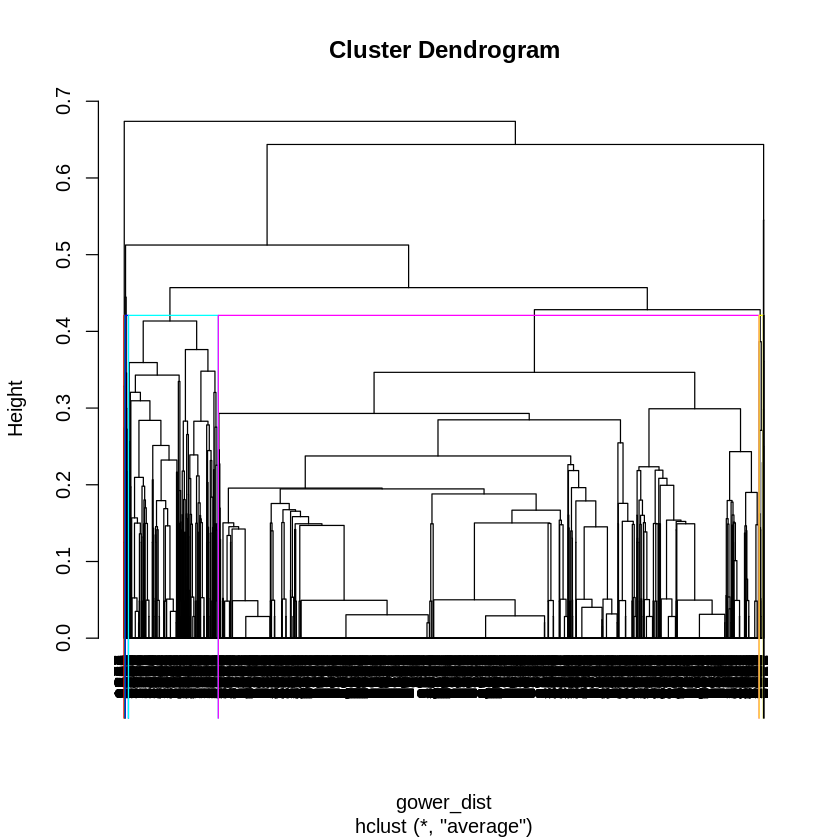

In [18]:
#######################
# Hierarchical method # 
#######################
hc <- hclust(gower_dist, method="average")
plot(hc, hang=-0.1)
clus6 <- cutree(hc, 6)

rect.hclust(hc , k = 8, border = 2:10)

In [38]:
stats.df.divisive <- cstats.table(gower_dist, d, 7)
stats.df.divisive

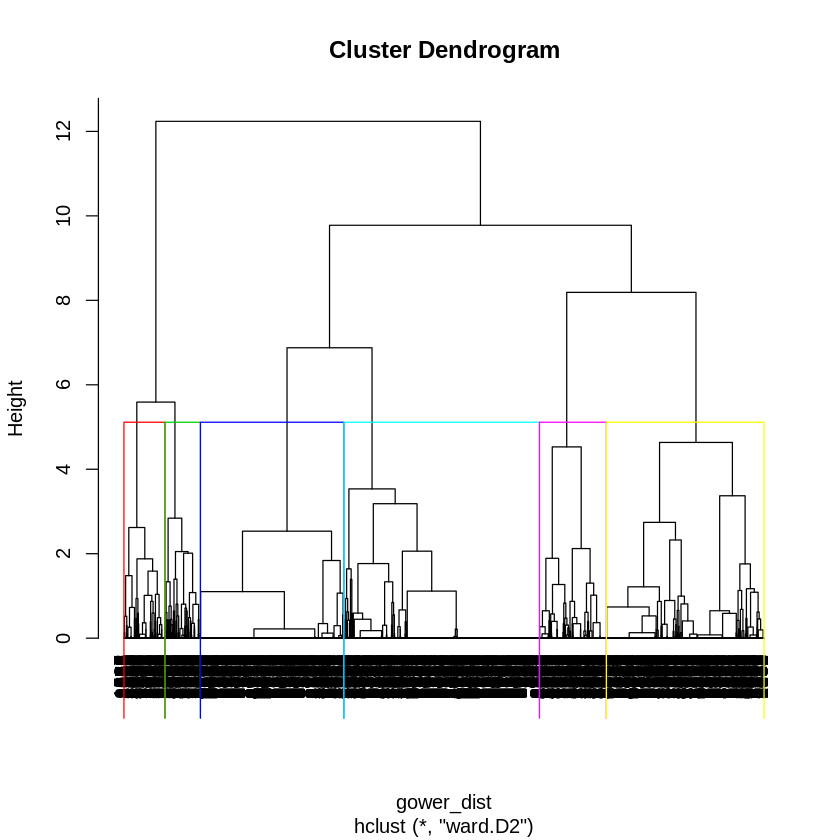

In [17]:
hc2 <- hclust(gower_dist, method="ward.D2")
plot(hc2, hang=-0.1)
hc2_cut = cutree(hc2,6)
rect.hclust(hc2 , k = 6, border = 2:15)

In [18]:
# examine results in each class
t_c1 <- which(hc2_cut %in% c(1))
a[t_c1,]
t_c2 <- which(hc2_cut %in% c(2))
a[t_c2,]
t_c3 <- which(hc2_cut %in% c(3))
a[t_c3,]
t_c4 <- which(hc2_cut %in% c(4))
a[t_c4,]
t_c5 <- which(hc2_cut %in% c(5))
a[t_c5,]
t_c6 <- which(hc2_cut %in% c(6))
a[t_c6,]

,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
1,200501CP00001,Slight,Winter,Weekend,Darkness - lights lit,1,2,0,5,City of London,Dry,Single carriageway,None,30,Evening,Urban,Fine,2005
2,200501CP00002,Slight,Winter,Weekend,Darkness - lights lit,1,2,0,0,City of London,Dry,Single carriageway,None,30,Evening,Urban,Fine,2005
3,200501CP00003,Slight,Winter,Weekend,Daylight,1,3,0,5,City of London,Dry,Single carriageway,None,30,Morning,Urban,Fine,2005
12,200501CP00013,Slight,Winter,Weekend,Daylight,1,1,0,0,City of London,Dry,Single carriageway,None,30,Afternoon,Urban,Fine,2005
14,200501CP00015,Slight,Winter,Weekend,Darkness - lights lit,1,2,0,0,City of London,Dry,Dual carriageway,None,30,Night,Urban,Fine,2005
15,200501CP00016,Slight,Winter,Weekend,Daylight,1,2,0,1,City of London,Dry,Single carriageway,None,30,Afternoon,Urban,Fine,2005
24,200501CP00025,Slight,Winter,Weekend,Daylight,1,2,0,4,City of London,Dry,One way street,None,30,Afternoon,Urban,Fine,2005
34,200501CP00035,Slight,Winter,Weekend,Daylight,1,2,0,4,City of London,Dry,Dual carriageway,None,30,Afternoon,Urban,Fine,2005
36,200501CP00037,Slight,Spring,Weekend,Daylight,1,2,0,5,City of London,Dry,Single carriageway,None,30,Afternoon,Urban,Fine,2005
37,200501CP00038,Slight,Spring,Weekend,Daylight,1,2,0,5,City of London,Dry,Dual carriageway,None,30,Afternoon,Urban,Fine,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
4,200501CP00004,Slight,Winter,Weekend,Darkness - lights lit,3,2,0,5,City of London,Wet or damp,One way street,None,30,Night,Urban,Bad,2005
8,200501CP00009,Serious,Winter,Weekday,Daylight,1,2,0,4,City of London,Wet or damp,One way street,None,30,Afternoon,Urban,Bad,2005
10,200501CP00011,Slight,Winter,Weekday,Darkness - lights lit,1,3,0,0,City of London,Wet or damp,Single carriageway,None,20,Night,Urban,Bad,2005
16,200501CP00017,Serious,Winter,Weekday,Darkness - lights lit,1,1,0,4,City of London,Wet or damp,Single carriageway,None,30,Afternoon,Urban,Bad,2005
20,200501CP00021,Slight,Winter,Weekday,Darkness - lights lit,1,2,0,4,City of London,Wet or damp,Dual carriageway,None,30,Evening,Urban,Bad,2005
22,200501CP00023,Slight,Winter,Weekday,Darkness - lights lit,1,1,0,5,City of London,Wet or damp,Single carriageway,None,30,Evening,Urban,Bad,2005
39,200501CP00040,Serious,Spring,Weekday,Darkness - lights lit,4,2,0,5,City of London,Wet or damp,Roundabout,None,30,Evening,Urban,Bad,2005
221,200501CP00231,Slight,Autumn,Weekday,Darkness - lights lit,1,3,0,0,City of London,Wet or damp,Single carriageway,None,30,Evening,Urban,Bad,2005
223,200501CP00233,Slight,Autumn,Weekday,Darkness - lights lit,1,2,0,5,City of London,Wet or damp,Single carriageway,None,30,Morning,Urban,Bad,2005
227,200501CP00237,Slight,Autumn,Weekend,Darkness - lights lit,1,2,0,5,City of London,Wet or damp,Unknown,None,30,Evening,Urban,Bad,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
5,200501CP00005,Slight,Winter,Weekday,Daylight,1,1,0,5,City of London,Dry,Dual carriageway,None,30,Afternoon,Urban,Fine,2005
11,200501CP00012,Slight,Winter,Weekday,Daylight,1,1,0,4,City of London,Dry,Single carriageway,None,30,Afternoon,Urban,Fine,2005
26,200501CP00027,Slight,Winter,Weekday,Daylight,1,2,0,5,City of London,Dry,Single carriageway,None,30,Afternoon,Urban,Fine,2005
28,200501CP00029,Slight,Winter,Weekday,Daylight,1,1,0,5,City of London,Dry,Single carriageway,None,30,Afternoon,Urban,Fine,2005
35,200501CP00036,Serious,Spring,Weekday,Daylight,1,2,0,4,City of London,Wet or damp,One way street,None,30,Afternoon,Urban,Fine,2005
40,200501CP00041,Serious,Spring,Weekday,Daylight,1,2,0,0,City of London,Dry,Single carriageway,None,30,Afternoon,Urban,Fine,2005
44,200501CP00046,Slight,Spring,Weekday,Daylight,1,1,0,0,City of London,Dry,Single carriageway,None,30,Afternoon,Urban,Fine,2005
53,200501CP00055,Slight,Spring,Weekday,Daylight,1,1,0,0,City of London,Dry,Dual carriageway,None,30,Afternoon,Urban,Fine,2005
56,200501CP00058,Slight,Spring,Weekday,Daylight,2,1,0,8,City of London,Wet or damp,One way street,None,30,Evening,Urban,Unknown,2005
57,200501CP00059,Slight,Spring,Weekday,Daylight,1,2,0,0,City of London,Dry,Dual carriageway,None,30,Afternoon,Urban,Fine,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
6,200501CP00006,Serious,Winter,Weekday,Darkness - lights lit,1,2,0,5,City of London,Dry,Roundabout,None,30,Evening,Urban,Fine,2005
17,200501CP00018,Serious,Winter,Weekday,Darkness - lights lit,1,1,0,5,City of London,Dry,Dual carriageway,None,30,Evening,Urban,Fine,2005
19,200501CP00020,Slight,Winter,Weekday,Darkness - lights lit,1,1,0,4,City of London,Dry,Single carriageway,None,30,Night,Urban,Fine,2005
25,200501CP00026,Slight,Winter,Weekday,Darkness - lights lit,1,1,0,5,City of London,Dry,Single carriageway,None,30,Evening,Urban,Fine,2005
31,200501CP00032,Slight,Winter,Weekday,Daylight,1,2,0,0,City of London,Dry,Single carriageway,None,30,Evening,Urban,Fine,2005
41,200501CP00043,Slight,Spring,Weekday,Darkness - lights lit,1,2,0,5,City of London,Dry,Single carriageway,None,30,Evening,Urban,Fine,2005
42,200501CP00044,Slight,Spring,Weekday,Darkness - lights unlit,2,1,0,0,City of London,Dry,Single carriageway,None,30,Evening,Urban,Fine,2005
51,200501CP00053,Slight,Spring,Weekday,Daylight,1,2,0,5,City of London,Dry,Dual carriageway,None,30,Evening,Urban,Fine,2005
54,200501CP00056,Slight,Spring,Weekday,Daylight,1,1,0,1,City of London,Dry,One way street,None,30,Evening,Urban,Fine,2005
55,200501CP00057,Serious,Spring,Weekday,Darkness - lights lit,1,2,0,0,City of London,Dry,Dual carriageway,None,30,Evening,Urban,Fine,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
7,200501CP00008,Serious,Winter,Weekday,Daylight,1,2,0,0,City of London,Dry,Single carriageway,None,30,Morning,Urban,Fine,2005
13,200501CP00014,Slight,Winter,Weekday,Daylight,1,2,0,5,City of London,Dry,Single carriageway,None,30,Morning,Urban,Fine,2005
18,200501CP00019,Slight,Winter,Weekday,Daylight,1,2,0,5,City of London,Dry,Roundabout,None,30,Afternoon,Urban,Fine,2005
23,200501CP00024,Slight,Winter,Weekday,Daylight,1,1,0,5,City of London,Dry,Single carriageway,None,30,Morning,Urban,Fine,2005
27,200501CP00028,Slight,Winter,Weekday,Daylight,1,1,0,5,City of London,Dry,Dual carriageway,None,30,Morning,Urban,Fine,2005
29,200501CP00030,Slight,Winter,Weekday,Daylight,1,2,0,0,City of London,Dry,Single carriageway,None,30,Morning,Urban,Fine,2005
32,200501CP00033,Serious,Winter,Weekday,Daylight,1,1,0,0,City of London,Dry,One way street,None,30,Morning,Urban,Fine,2005
33,200501CP00034,Slight,Winter,Weekday,Daylight,1,2,0,0,City of London,Dry,Single carriageway,None,30,Morning,Urban,Fine,2005
38,200501CP00039,Slight,Spring,Weekday,Daylight,2,3,0,0,City of London,Dry,One way street,None,30,Morning,Urban,Fine,2005
45,200501CP00047,Slight,Spring,Weekday,Daylight,1,1,0,5,City of London,Dry,Single carriageway,None,30,Morning,Urban,Fine,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
9,200501CP00010,Serious,Winter,Weekday,Daylight,1,1,0,5,City of London,Wet or damp,Single carriageway,None,30,Morning,Urban,Bad,2005
21,200501CP00022,Slight,Winter,Weekday,Daylight,1,1,0,0,City of London,Wet or damp,Dual carriageway,Special,30,Afternoon,Urban,Bad,2005
30,200501CP00031,Slight,Winter,Weekday,Daylight,1,2,0,0,City of London,Wet or damp,Dual carriageway,None,30,Morning,Urban,Bad,2005
50,200501CP00052,Slight,Spring,Weekday,Daylight,2,1,0,0,City of London,Wet or damp,Single carriageway,None,30,Afternoon,Urban,Unknown,2005
62,200501CP00064,Slight,Spring,Weekday,Daylight,1,2,0,0,City of London,Wet or damp,Single carriageway,None,30,Afternoon,Urban,Fine,2005
63,200501CP00065,Slight,Spring,Weekday,Daylight,1,1,0,0,City of London,Wet or damp,Single carriageway,None,30,Afternoon,Urban,Fine,2005
74,200501CP00076,Slight,Spring,Weekday,Daylight,1,2,0,5,City of London,Wet or damp,Single carriageway,None,30,Afternoon,Urban,Fine,2005
86,200501CP00089,Slight,Spring,Weekday,Daylight,1,1,0,0,City of London,Wet or damp,Dual carriageway,None,30,Afternoon,Urban,Bad,2005
98,200501CP00102,Serious,Summer,Weekday,Daylight,1,1,0,5,City of London,Wet or damp,Single carriageway,None,30,Evening,Urban,Bad,2005
112,200501CP00117,Slight,Summer,Weekday,Daylight,1,1,0,5,City of London,Wet or damp,Single carriageway,None,30,Afternoon,Urban,Unknown,2005


In [195]:
#hc3 <- hclust(gower_dist, method="complete")
#plot(hc3, hang=-0.1)

#rect.hclust(hc3 , k = 6, border = 2:10)

In [21]:
library(fpc)
hc_stats <- cluster.stats(gower_dist,  clus6)

In [22]:
show(hc_stats)

$n
[1] 4084

$cluster.number
[1] 6

$cluster.size
[1] 3477  573    5   24    2    3

$min.cluster.size
[1] 2

$noisen
[1] 0

$diameter
[1] 0.9233566 0.9233566 0.4233566 0.6733566 0.2983566 0.4233566

$average.distance
[1] 0.2415242 0.3356351 0.2693426 0.3083111 0.2983566 0.3239044

$median.distance
[1] 0.2500000 0.3266434 0.2741783 0.2983566 0.2983566 0.2983566

$separation
[1] 0.125 0.125 0.125 0.125 0.250 0.250

$average.toother
[1] 0.4617691 0.4587258 0.6738273 0.5128775 0.6508900 0.6389859

$separation.matrix
      [,1]  [,2]  [,3]  [,4]  [,5]  [,6]
[1,] 0.000 0.125 0.250 0.125 0.250 0.250
[2,] 0.125 0.000 0.125 0.125 0.375 0.250
[3,] 0.250 0.125 0.000 0.250 0.500 0.500
[4,] 0.125 0.125 0.250 0.000 0.250 0.625
[5,] 0.250 0.375 0.500 0.250 0.000 0.375
[6,] 0.250 0.250 0.500 0.625 0.375 0.000

$ave.between.matrix
          [,1]      [,2]      [,3]      [,4]      [,5]      [,6]
[1,] 0.0000000 0.4569910 0.7027565 0.4892330 0.6349969 0.6375534
[2,] 0.4569910 0.0000000 0.5019537 0.654124

In [19]:
library(cluster)

# compare DIANA results to PAM
d <- diana(gower_dist)
d6 <- cutree(d, 6)

In [20]:
d$dc

[1] 0.9953362

In [ ]:
# k = 2 to k = 15
dunn <- vector()
for(i in 2:8){
    hcut <- cutree(hc,i)
    hsil <- cluster.stats(gower_dist,  hcut)
    #ss <- hsil$ch
    ss <- hsil$dunn2
    dunn[i] <- ss
    
}



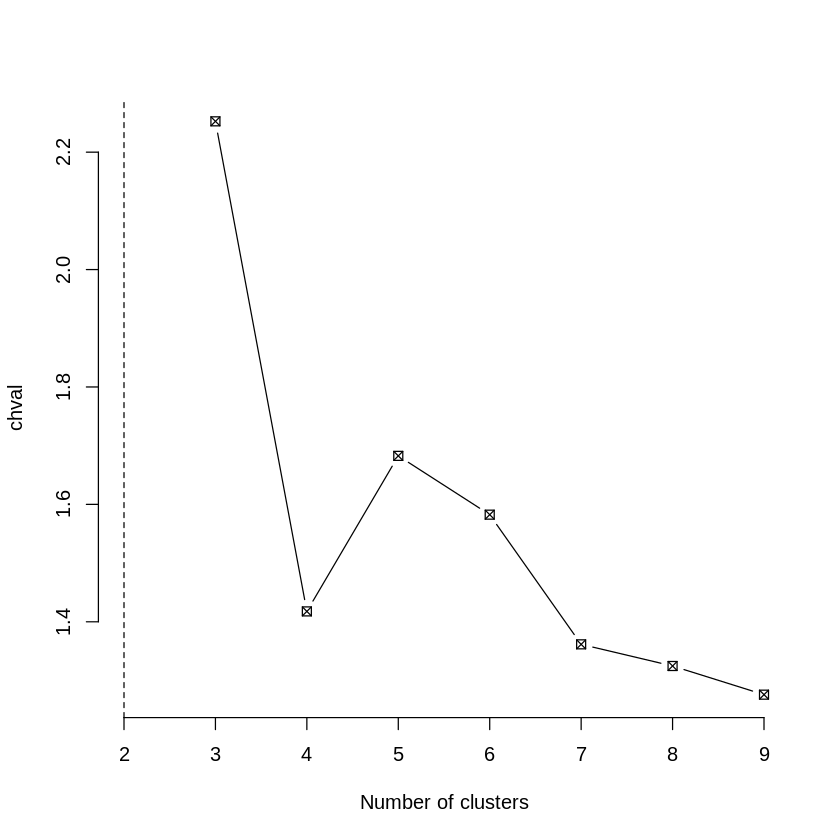

In [206]:

# Plot the  average silhouette width
plot(2:9,dunn, type = "b", pch = 7, 
     frame = FALSE, xlab = "Number of clusters")
abline(v = which.max(chval),lty= 2)

In [69]:
d5 <- cutree(d, 5)
d5_stats <- cluster.stats(gower_dist,  d5)

In [70]:
show(d5_stats)

$n
[1] 4084

$cluster.number
[1] 5

$cluster.size
[1]  202 2753  456  671    2

$min.cluster.size
[1] 2

$noisen
[1] 0

$diameter
[1] 0.6733566 0.7983566 0.8467132 0.6733566 0.2500000

$average.distance
[1] 0.1792140 0.1884581 0.3384517 0.1540245 0.2500000

$median.distance
[1] 0.1733566 0.1733566 0.3750000 0.1532868 0.2500000

$separation
[1] 0.1250000 0.1250000 0.1250000 0.1250000 0.2983566

$average.toother
[1] 0.4399698 0.4005177 0.4911223 0.3485631 0.6930788

$separation.matrix
      [,1]      [,2]  [,3]  [,4]      [,5]
[1,] 0.000 0.1250000 0.125 0.125 0.3750000
[2,] 0.125 0.0000000 0.125 0.125 0.2983566
[3,] 0.125 0.1250000 0.000 0.125 0.3750000
[4,] 0.125 0.1250000 0.125 0.000 0.5000000
[5,] 0.375 0.2983566 0.375 0.500 0.0000000

$ave.between.matrix
          [,1]      [,2]      [,3]      [,4]      [,5]
[1,] 0.0000000 0.4473278 0.5883148 0.3082382 0.6850538
[2,] 0.4473278 0.0000000 0.4847868 0.3282890 0.6920943
[3,] 0.5883148 0.4847868 0.0000000 0.4872712 0.6876695
[4,] 0.308238

In [196]:
#plot(as.dendrogram(d), cex = 0.6)

#rect.hclust(d , k = 6, border = 2:15)

In [36]:
#PAM results with accident id attacjhed to cluster
result1 <- c %>% mutate(id = a$Accident_Index) %>% dplyr::select(id, pam_fit.cluster)

In [91]:
d4 <- cutree(d, 4)

In [92]:
d4_stats <- cluster.stats(gower_dist,  d4)
show(d4_stats)

$n
[1] 4084

$cluster.number
[1] 4

$cluster.size
[1]  873 2753  456    2

$min.cluster.size
[1] 2

$noisen
[1] 0

$diameter
[1] 0.8750000 0.7983566 0.8467132 0.2500000

$average.distance
[1] 0.2102836 0.1884581 0.3384517 0.2500000

$median.distance
[1] 0.1733566 0.1733566 0.3750000 0.2500000

$separation
[1] 0.1250000 0.1250000 0.1250000 0.2983566

$average.toother
[1] 0.3780327 0.4005177 0.4911223 0.6930788

$separation.matrix
      [,1]      [,2]  [,3]      [,4]
[1,] 0.000 0.1250000 0.125 0.3750000
[2,] 0.125 0.0000000 0.125 0.2983566
[3,] 0.125 0.1250000 0.000 0.3750000
[4,] 0.375 0.2983566 0.375 0.0000000

$ave.between.matrix
          [,1]      [,2]      [,3]      [,4]
[1,] 0.0000000 0.3558329 0.5106513 0.6990091
[2,] 0.3558329 0.0000000 0.4847868 0.6920943
[3,] 0.5106513 0.4847868 0.0000000 0.6876695
[4,] 0.6990091 0.6920943 0.6876695 0.0000000

$average.between
[1] 0.4114958

$average.within
[1] 0.1940445

$n.between
[1] 4064989

$n.within
[1] 4272497

$max.diameter
[1] 0.875



In [2]:
table(result1$pam_fit.cluster, d6)

ERROR: Error in table(result1$pam_fit.cluster, d6): object 'result1' not found


In [23]:
library(fpc)
hc_stats <- cluster.stats(gower_dist,  d6)

In [24]:
show(hc_stats)

$n
[1] 4084

$cluster.number
[1] 6

$cluster.size
[1]  202 2753   75  671  381    2

$min.cluster.size
[1] 2

$noisen
[1] 0

$diameter
[1] 0.6733566 0.7983566 0.7016434 0.6733566 0.7016434 0.2500000

$average.distance
[1] 0.1792140 0.1884581 0.3003121 0.1540245 0.3005775 0.2500000

$median.distance
[1] 0.1733566 0.1733566 0.2983566 0.1532868 0.2983566 0.2500000

$separation
[1] 0.1250000 0.1250000 0.1250000 0.1250000 0.1250000 0.2983566

$average.toother
[1] 0.4399698 0.4005177 0.5689575 0.3485631 0.4723867 0.6930788

$separation.matrix
      [,1]      [,2]  [,3]  [,4]  [,5]      [,6]
[1,] 0.000 0.1250000 0.125 0.125 0.250 0.3750000
[2,] 0.125 0.0000000 0.125 0.125 0.125 0.2983566
[3,] 0.125 0.1250000 0.000 0.250 0.125 0.5000000
[4,] 0.125 0.1250000 0.250 0.000 0.125 0.5000000
[5,] 0.250 0.1250000 0.125 0.125 0.000 0.3750000
[6,] 0.375 0.2983566 0.500 0.500 0.375 0.0000000

$ave.between.matrix
          [,1]      [,2]      [,3]      [,4]      [,5]      [,6]
[1,] 0.0000000 0.4473278 0.4

In [27]:
pam_stats <- cluster.stats(gower_dist,  pam_fit$cluster)
show(pam_stats)

$n
[1] 4084

$cluster.number
[1] 6

$cluster.size
[1]  586 1253  249 1237  396  363

$min.cluster.size
[1] 249

$noisen
[1] 0

$diameter
[1] 0.6733566 0.6733566 0.9233566 0.7983566 0.7983566 0.6733566

$average.distance
[1] 0.1527581 0.1081519 0.2493720 0.1412632 0.2934628 0.1126610

$median.distance
[1] 0.1250000 0.1250000 0.2500000 0.1250000 0.2983566 0.1250000

$separation
[1] 0.0483566 0.1250000 0.0483566 0.1250000 0.0483566 0.1250000

$average.toother
[1] 0.3653876 0.3151905 0.4480794 0.3200139 0.4694345 0.2827628

$separation.matrix
          [,1]  [,2]      [,3]  [,4]      [,5]  [,6]
[1,] 0.0000000 0.125 0.0483566 0.125 0.1250000 0.125
[2,] 0.1250000 0.000 0.1250000 0.125 0.1250000 0.125
[3,] 0.0483566 0.125 0.0000000 0.125 0.0483566 0.125
[4,] 0.1250000 0.125 0.1250000 0.000 0.1250000 0.125
[5,] 0.1250000 0.125 0.0483566 0.125 0.0000000 0.125
[6,] 0.1250000 0.125 0.1250000 0.125 0.1250000 0.000

$ave.between.matrix
          [,1]      [,2]      [,3]      [,4]      [,5]      [,6

In [143]:
# examine results in each class
t_c1 <- which(d6 %in% c(1))
mergedata[t_c1,]
t_c2 <- which(d6 %in% c(2))
mergedata[t_c2,]
t_c3 <- which(d6 %in% c(3))
mergedata[t_c3,]
t_c4 <- which(d6 %in% c(4))
mergedata[t_c4,]
t_c5 <- which(d6 %in% c(5))
mergedata[t_c5,]
t_c6 <- which(d6 %in% c(6))
mergedata[t_c6,]

,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,⋯,Pedestrian_Crossing.Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
1,200501CP00001,Slight,2005-01-01,Saturday,Darkness - lights lit,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
2,200501CP00002,Slight,2005-01-02,Sunday,Darkness - lights lit,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004293,2005
14,200501CP00015,Slight,2005-01-22,Saturday,Darkness - lights lit,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
104,200501CP00108,Slight,2005-06-04,Saturday,Darkness - lights lit,1,1,0,4,City of London,⋯,non-junction pedestrian crossing,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000005,2005
143,200501CP00150,Slight,2005-07-24,Sunday,Darkness - lights lit,2,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
176,200501CP00183,Slight,2005-08-21,Sunday,Darkness - lights lit,1,1,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
251,200501CP00263,Slight,2005-11-12,Saturday,Darkness - lights lit,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
262,200501CP00275,Slight,2005-11-26,Saturday,Darkness - lights lit,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
285,200501CP00298,Slight,2005-11-27,Sunday,Darkness - lights lit,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,No,E01000004,2005
288,200501CP00301,Slight,2005-12-10,Saturday,Darkness - lights lit,1,1,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,⋯,Pedestrian_Crossing.Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
3,200501CP00003,Slight,2005-01-02,Sunday,Daylight,1,3,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
5,200501CP00005,Slight,2005-01-04,Tuesday,Daylight,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
7,200501CP00008,Serious,2005-01-10,Monday,Daylight,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01002705,2005
11,200501CP00012,Slight,2005-01-14,Friday,Daylight,1,1,0,4,City of London,⋯,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
12,200501CP00013,Slight,2005-01-15,Saturday,Daylight,1,1,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
13,200501CP00014,Slight,2005-01-19,Wednesday,Daylight,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
15,200501CP00016,Slight,2005-01-23,Sunday,Daylight,1,2,0,1,City of London,⋯,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
18,200501CP00019,Slight,2005-02-07,Monday,Daylight,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
23,200501CP00024,Slight,2005-02-15,Tuesday,Daylight,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
24,200501CP00025,Slight,2005-02-05,Saturday,Daylight,1,2,0,4,City of London,⋯,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,⋯,Pedestrian_Crossing.Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
4,200501CP00004,Slight,2005-01-08,Saturday,Darkness - lights lit,3,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01000004,2005
227,200501CP00237,Slight,2005-10-16,Sunday,Darkness - lights lit,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01000004,2005
315,200601CP00004,Slight,2006-01-14,Saturday,Darkness - lights lit,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,1,Yes,E01000004,2006
395,200601CP00087,Slight,2006-04-09,Sunday,Darkness - lights lit,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01000004,2006
401,200601CP00094,Slight,2006-04-23,Sunday,Daylight,1,1,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01000004,2006
404,200601CP00097,Slight,2006-04-23,Sunday,Daylight,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01003929,2006
407,200601CP00100,Serious,2006-04-23,Sunday,Daylight,2,3,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Raining without high winds,Wet/Damp,Roadworks,None,1,Yes,E01000004,2006
433,200601CP00129,Slight,2006-05-20,Saturday,Darkness - lights lit,1,1,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining with high winds,Wet/Damp,Roadworks,None,1,Yes,E01000004,2006
437,200601CP00133,Slight,2006-02-05,Sunday,Darkness - lights lit,1,1,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,1,Yes,E01000004,2006
574,200601CP00276,Slight,2006-10-01,Sunday,Darkness - lights lit,2,2,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,No,E01000004,2006


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,⋯,Pedestrian_Crossing.Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
6,200501CP00006,Serious,2005-01-07,Friday,Darkness - lights lit,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
17,200501CP00018,Serious,2005-02-01,Tuesday,Darkness - lights lit,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
19,200501CP00020,Slight,2005-02-03,Thursday,Darkness - lights lit,1,1,0,4,City of London,⋯,non-junction pedestrian crossing,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
25,200501CP00026,Slight,2005-02-18,Friday,Darkness - lights lit,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
41,200501CP00043,Slight,2005-03-10,Thursday,Darkness - lights lit,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
42,200501CP00044,Slight,2005-03-11,Friday,Darkness - lights unlit,2,1,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present but unlit,Fine without high winds,Dry,None,None,1,No,E01000004,2005
55,200501CP00057,Serious,2005-04-01,Friday,Darkness - lights lit,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002705,2005
80,200501CP00082,Slight,2005-05-12,Thursday,Darkness - lights lit,1,2,0,4,City of London,⋯,non-junction pedestrian crossing,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
90,200501CP00093,Slight,2005-05-25,Wednesday,Darkness - lights lit,1,1,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
95,200501CP00099,Slight,2005-05-31,Tuesday,Darkness - lights lit,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,⋯,Pedestrian_Crossing.Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
8,200501CP00009,Serious,2005-01-10,Monday,Daylight,1,2,0,4,City of London,⋯,non-junction pedestrian crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01000001,2005
9,200501CP00010,Serious,2005-01-11,Tuesday,Daylight,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01000004,2005
10,200501CP00011,Slight,2005-01-18,Tuesday,Darkness - lights lit,1,3,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,,2005
16,200501CP00017,Serious,2005-01-28,Friday,Darkness - lights lit,1,1,0,4,City of London,⋯,non-junction pedestrian crossing,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01000004,2005
20,200501CP00021,Slight,2005-01-20,Thursday,Darkness - lights lit,1,2,0,4,City of London,⋯,non-junction pedestrian crossing,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01000004,2005
21,200501CP00022,Slight,2005-02-17,Thursday,Daylight,1,1,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Road surface defective,None,1,Yes,E01000004,2005
22,200501CP00023,Slight,2005-02-10,Thursday,Darkness - lights lit,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01000004,2005
30,200501CP00031,Slight,2005-02-25,Friday,Daylight,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Snowing without high winds,Wet/Damp,None,None,1,Yes,E01000004,2005
39,200501CP00040,Serious,2005-03-07,Monday,Darkness - lights lit,4,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01000004,2005
50,200501CP00052,Slight,2005-03-30,Wednesday,Daylight,2,1,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Other,Wet/Damp,None,None,1,Yes,E01000004,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,⋯,Pedestrian_Crossing.Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
3720,2016010006912,Slight,2016-11-25,Friday,Darkness - lighting unknown,1,1,0,NA,City of London,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3721,2016010008508,Slight,2016-12-03,Saturday,Darkness - lighting unknown,1,1,0,NA,City of London,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [136]:
# examine results in each class
t_c1 <- which(d4 %in% c(1))
a[t_c1,]
t_c2 <- which(d4 %in% c(2))
a[t_c2,]
t_c3 <- which(d4 %in% c(3))
a[t_c3,]
t_c4 <- which(d4 %in% c(4))
a[t_c4,]


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
1,200501CP00001,Slight,Winter,Weekend,Darkness - lights lit,1,2,0,5,City of London,Dry,Single carriageway,None,30,Evening,Urban,Fine,2005
2,200501CP00002,Slight,Winter,Weekend,Darkness - lights lit,1,2,0,0,City of London,Dry,Single carriageway,None,30,Evening,Urban,Fine,2005
6,200501CP00006,Serious,Winter,Weekday,Darkness - lights lit,1,2,0,5,City of London,Dry,Roundabout,None,30,Evening,Urban,Fine,2005
14,200501CP00015,Slight,Winter,Weekend,Darkness - lights lit,1,2,0,0,City of London,Dry,Dual carriageway,None,30,Night,Urban,Fine,2005
17,200501CP00018,Serious,Winter,Weekday,Darkness - lights lit,1,1,0,5,City of London,Dry,Dual carriageway,None,30,Evening,Urban,Fine,2005
19,200501CP00020,Slight,Winter,Weekday,Darkness - lights lit,1,1,0,4,City of London,Dry,Single carriageway,None,30,Night,Urban,Fine,2005
25,200501CP00026,Slight,Winter,Weekday,Darkness - lights lit,1,1,0,5,City of London,Dry,Single carriageway,None,30,Evening,Urban,Fine,2005
41,200501CP00043,Slight,Spring,Weekday,Darkness - lights lit,1,2,0,5,City of London,Dry,Single carriageway,None,30,Evening,Urban,Fine,2005
42,200501CP00044,Slight,Spring,Weekday,Darkness - lights unlit,2,1,0,0,City of London,Dry,Single carriageway,None,30,Evening,Urban,Fine,2005
55,200501CP00057,Serious,Spring,Weekday,Darkness - lights lit,1,2,0,0,City of London,Dry,Dual carriageway,None,30,Evening,Urban,Fine,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
3,200501CP00003,Slight,Winter,Weekend,Daylight,1,3,0,5,City of London,Dry,Single carriageway,None,30,Morning,Urban,Fine,2005
5,200501CP00005,Slight,Winter,Weekday,Daylight,1,1,0,5,City of London,Dry,Dual carriageway,None,30,Afternoon,Urban,Fine,2005
7,200501CP00008,Serious,Winter,Weekday,Daylight,1,2,0,0,City of London,Dry,Single carriageway,None,30,Morning,Urban,Fine,2005
11,200501CP00012,Slight,Winter,Weekday,Daylight,1,1,0,4,City of London,Dry,Single carriageway,None,30,Afternoon,Urban,Fine,2005
12,200501CP00013,Slight,Winter,Weekend,Daylight,1,1,0,0,City of London,Dry,Single carriageway,None,30,Afternoon,Urban,Fine,2005
13,200501CP00014,Slight,Winter,Weekday,Daylight,1,2,0,5,City of London,Dry,Single carriageway,None,30,Morning,Urban,Fine,2005
15,200501CP00016,Slight,Winter,Weekend,Daylight,1,2,0,1,City of London,Dry,Single carriageway,None,30,Afternoon,Urban,Fine,2005
18,200501CP00019,Slight,Winter,Weekday,Daylight,1,2,0,5,City of London,Dry,Roundabout,None,30,Afternoon,Urban,Fine,2005
23,200501CP00024,Slight,Winter,Weekday,Daylight,1,1,0,5,City of London,Dry,Single carriageway,None,30,Morning,Urban,Fine,2005
24,200501CP00025,Slight,Winter,Weekend,Daylight,1,2,0,4,City of London,Dry,One way street,None,30,Afternoon,Urban,Fine,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
4,200501CP00004,Slight,Winter,Weekend,Darkness - lights lit,3,2,0,5,City of London,Wet or damp,One way street,None,30,Night,Urban,Bad,2005
8,200501CP00009,Serious,Winter,Weekday,Daylight,1,2,0,4,City of London,Wet or damp,One way street,None,30,Afternoon,Urban,Bad,2005
9,200501CP00010,Serious,Winter,Weekday,Daylight,1,1,0,5,City of London,Wet or damp,Single carriageway,None,30,Morning,Urban,Bad,2005
10,200501CP00011,Slight,Winter,Weekday,Darkness - lights lit,1,3,0,0,City of London,Wet or damp,Single carriageway,None,20,Night,Urban,Bad,2005
16,200501CP00017,Serious,Winter,Weekday,Darkness - lights lit,1,1,0,4,City of London,Wet or damp,Single carriageway,None,30,Afternoon,Urban,Bad,2005
20,200501CP00021,Slight,Winter,Weekday,Darkness - lights lit,1,2,0,4,City of London,Wet or damp,Dual carriageway,None,30,Evening,Urban,Bad,2005
21,200501CP00022,Slight,Winter,Weekday,Daylight,1,1,0,0,City of London,Wet or damp,Dual carriageway,Special,30,Afternoon,Urban,Bad,2005
22,200501CP00023,Slight,Winter,Weekday,Darkness - lights lit,1,1,0,5,City of London,Wet or damp,Single carriageway,None,30,Evening,Urban,Bad,2005
30,200501CP00031,Slight,Winter,Weekday,Daylight,1,2,0,0,City of London,Wet or damp,Dual carriageway,None,30,Morning,Urban,Bad,2005
39,200501CP00040,Serious,Spring,Weekday,Darkness - lights lit,4,2,0,5,City of London,Wet or damp,Roundabout,None,30,Evening,Urban,Bad,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
3720,2016010006912,Slight,Autumn,Weekday,Darkness - lighting unknown,1,1,0,NA,City of London,Data missing or out of range,Unknown,None,30,Night,Urban,Unknown,2016
3721,2016010008508,Slight,Winter,Weekend,Darkness - lighting unknown,1,1,0,NA,City of London,Data missing or out of range,Unknown,None,30,Morning,Urban,Unknown,2016


In [40]:
install.packages("dbscan")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


OPTICS ordering/clustering for 4084 objects.
Parameters: minPts = 50, eps = 2, eps_cl = NA, xi = NA
Available fields: order, reachdist, coredist, predecessor, minPts, eps,
                  eps_cl, xi

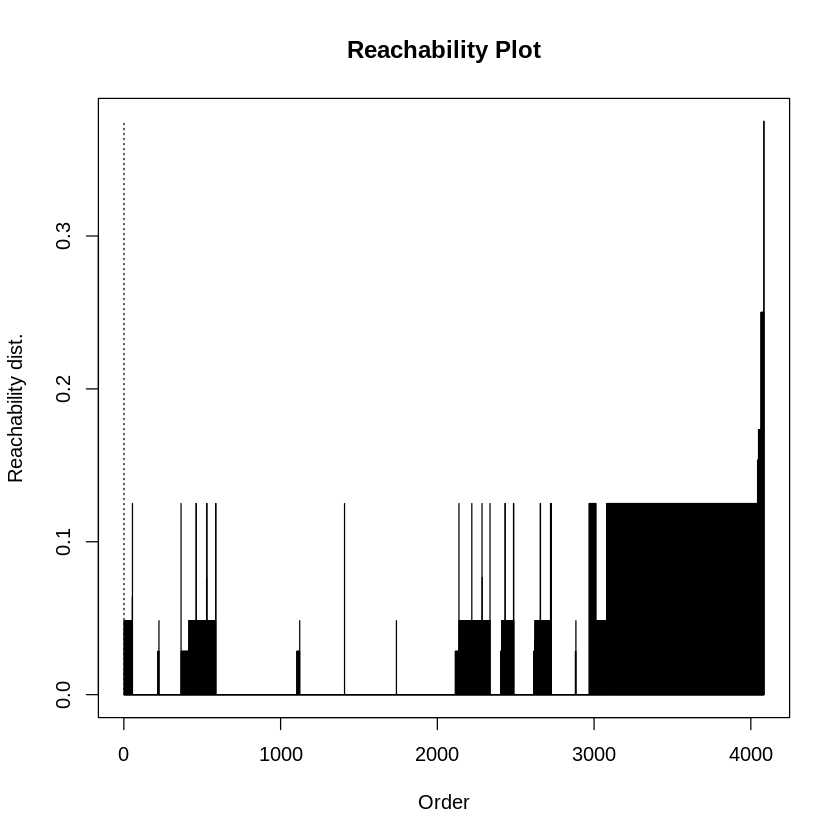

In [166]:
########################
# Density-base methods # 
########################

library("dbscan")
(res_col <- optics(gower_dist, eps=2, minPts = 50))
plot(res_col)


In [177]:
(res_col_d <- extractDBSCAN(res_col, eps_cl=0.121)) #6 Cluster, 961 noise points
(res_col_h <- extractXi(res_col, xi=0.2)) #14 luster, 0 noise points
res_col_h$clusters_xi

OPTICS ordering/clustering for 4084 objects.
Parameters: minPts = 50, eps = 2, eps_cl = 0.121, xi = NA
The clustering contains 16 cluster(s) and 1058 noise points.

   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
1058   54  310   96   67   56  821  730   82   65   51   96   53  170   64  242 
  16 
  69 

Available fields: order, reachdist, coredist, predecessor, minPts, eps,
                  eps_cl, xi, cluster

OPTICS ordering/clustering for 4084 objects.
Parameters: minPts = 50, eps = 2, eps_cl = NA, xi = 0.2
The clustering contains 14 cluster(s) and 0 noise points.

Available fields: order, reachdist, coredist, predecessor, minPts, eps,
                  eps_cl, xi, clusters_xi, cluster

start,end,cluster_id
1,54,1
1,4084,2
55,223,3
224,363,4
365,461,5
462,528,6
587,1121,7
1122,1407,8
1408,1738,9
1739,2137,10


In [161]:
db_stats <- cluster.stats(gower_dist, res_col_d$cluster)
show(db_stats)

Warning message in cluster.stats(gower_dist, res_col_d$cluster):
“clustering renumbered because maximum != number of clusters”

$n
[1] 4084

$cluster.number
[1] 6

$cluster.size
[1] 1811  310  821  730  170  242

$min.cluster.size
[1] 170

$noisen
[1] 0

$diameter
[1] 1.0000000 0.0967132 0.0967132 0.0967132 0.1122806 0.0766434

$average.distance
[1] 0.42463319 0.02544080 0.02329335 0.02578503 0.01956852 0.02282502

$median.distance
[1] 0.4233566 0.0483566 0.0000000 0.0282868 0.0000000 0.0000000

$separation
[1] 0.125 0.125 0.125 0.125 0.125 0.125

$average.toother
[1] 0.3431567 0.3137901 0.2666035 0.2662290 0.3071680 0.2450047

$separation.matrix
      [,1]  [,2]  [,3]  [,4]  [,5]  [,6]
[1,] 0.000 0.125 0.125 0.125 0.125 0.125
[2,] 0.125 0.000 0.250 0.250 0.375 0.125
[3,] 0.125 0.250 0.000 0.125 0.125 0.125
[4,] 0.125 0.250 0.125 0.000 0.250 0.125
[5,] 0.125 0.375 0.125 0.250 0.000 0.250
[6,] 0.125 0.125 0.125 0.125 0.250 0.000

$ave.between.matrix
          [,1]      [,2]      [,3]      [,4]      [,5]      [,6]
[1,] 0.0000000 0.3606621 0.3392158 0.3319899 0.3810579 0.3411624
[2,] 0.3606621 0.0000000 0.2748602 

In [33]:
library("fpc")
# Compute DBSCAN using fpc package
db <- fpc::dbscan(gower_dist, eps = 0.5, MinPts =40, method="dist")
plot(db, gower_dist, main = "DBSCAN", frame = FALSE)

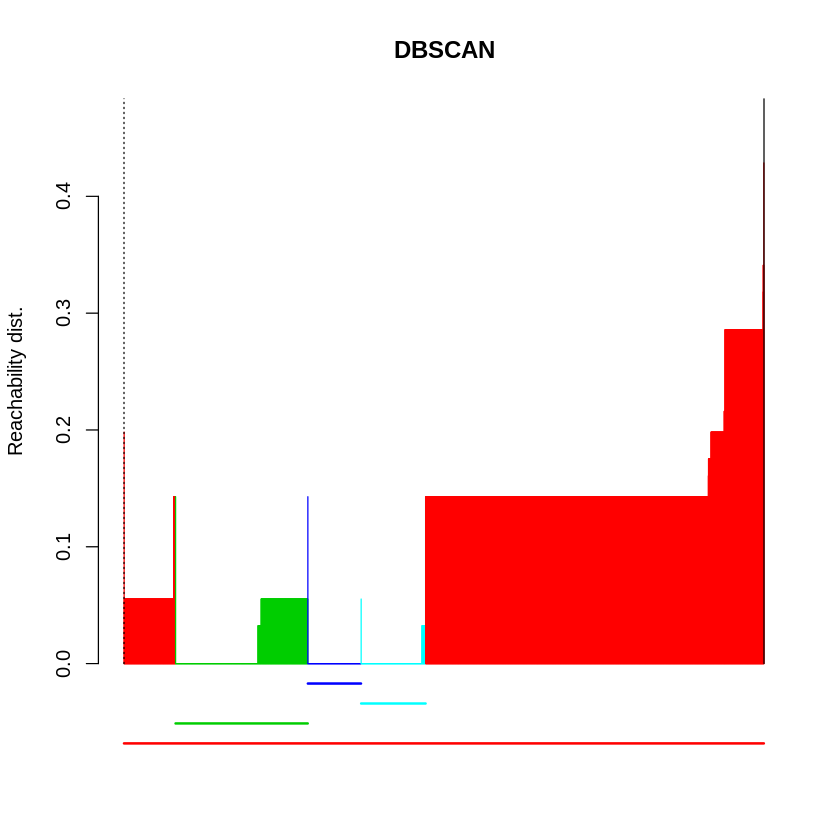

In [81]:
plot(res_col_h,gower_dist, main = "DBSCAN", frame = FALSE)

In [55]:
library("dbscan")
res <- optics_cut(res, eps = .1)
res

plot(res)
plot(x, col = res$cluster+1)

ERROR: Error in optics_cut(res, eps = 0.1): could not find function "optics_cut"


In [145]:
# examine results in each class
db_1 <-  which(res_col_d$cluster %in% c(0))
db_2 <-  which(res_col_d$cluster %in% c(1))
db_3 <-  which(res_col_d$cluster %in% c(2))
db_4 <-  which(res_col_d$cluster %in% c(3))
db_5 <-  which(res_col_d$cluster %in% c(4))
db_6 <-  which(res_col_d$cluster %in% c(5))
mergedata[db_1,]
mergedata[db_2,]
mergedata[db_3,]
mergedata[db_4,]
mergedata[db_5,]
mergedata[db_6,]

,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,⋯,Pedestrian_Crossing.Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
1,200501CP00001,Slight,2005-01-01,Saturday,Darkness - lights lit,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
2,200501CP00002,Slight,2005-01-02,Sunday,Darkness - lights lit,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004293,2005
3,200501CP00003,Slight,2005-01-02,Sunday,Daylight,1,3,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
4,200501CP00004,Slight,2005-01-08,Saturday,Darkness - lights lit,3,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01000004,2005
5,200501CP00005,Slight,2005-01-04,Tuesday,Daylight,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
6,200501CP00006,Serious,2005-01-07,Friday,Darkness - lights lit,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
8,200501CP00009,Serious,2005-01-10,Monday,Daylight,1,2,0,4,City of London,⋯,non-junction pedestrian crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01000001,2005
9,200501CP00010,Serious,2005-01-11,Tuesday,Daylight,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01000004,2005
10,200501CP00011,Slight,2005-01-18,Tuesday,Darkness - lights lit,1,3,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,,2005
12,200501CP00013,Slight,2005-01-15,Saturday,Daylight,1,1,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,⋯,Pedestrian_Crossing.Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
25,200501CP00026,Slight,2005-02-18,Friday,Darkness - lights lit,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
41,200501CP00043,Slight,2005-03-10,Thursday,Darkness - lights lit,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
115,200501CP00120,Slight,2005-05-09,Monday,Darkness - lights lit,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,No,E01000004,2005
173,200501CP00180,Slight,2005-08-17,Wednesday,Darkness - lights lit,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
181,200501CP00189,Slight,2005-08-25,Thursday,Darkness - lights lit,1,1,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
182,200501CP00190,Slight,2005-08-26,Friday,Darkness - lights lit,1,1,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000005,2005
190,200501CP00199,Slight,2005-09-09,Friday,Darkness - lights lit,1,1,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
207,200501CP00216,Serious,2005-09-16,Friday,Darkness - lights lit,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
217,200501CP00226,Slight,2005-09-15,Thursday,Darkness - lights lit,2,1,0,4,City of London,⋯,non-junction pedestrian crossing,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
220,200501CP00230,Slight,2005-09-30,Friday,Darkness - lights lit,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,⋯,Pedestrian_Crossing.Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
7,200501CP00008,Serious,2005-01-10,Monday,Daylight,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01002705,2005
13,200501CP00014,Slight,2005-01-19,Wednesday,Daylight,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
23,200501CP00024,Slight,2005-02-15,Tuesday,Daylight,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
29,200501CP00030,Slight,2005-02-02,Wednesday,Daylight,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
33,200501CP00034,Slight,2005-02-23,Wednesday,Daylight,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
45,200501CP00047,Slight,2005-03-15,Tuesday,Daylight,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
48,200501CP00050,Slight,2005-03-29,Tuesday,Daylight,1,1,0,4,City of London,⋯,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01000004,2005
52,200501CP00054,Slight,2005-04-04,Monday,Daylight,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01000004,2005
67,200501CP00069,Slight,2005-04-22,Friday,Daylight,2,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
68,200501CP00070,Slight,2005-04-22,Friday,Daylight,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01000004,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,⋯,Pedestrian_Crossing.Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
11,200501CP00012,Slight,2005-01-14,Friday,Daylight,1,1,0,4,City of London,⋯,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
26,200501CP00027,Slight,2005-02-23,Wednesday,Daylight,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
28,200501CP00029,Slight,2005-02-17,Thursday,Daylight,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01000004,2005
40,200501CP00041,Serious,2005-03-15,Tuesday,Daylight,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01000004,2005
44,200501CP00046,Slight,2005-03-14,Monday,Daylight,1,1,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
66,200501CP00068,Slight,2005-04-21,Thursday,Daylight,1,1,0,4,City of London,⋯,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
71,200501CP00073,Slight,2005-04-29,Friday,Daylight,1,1,0,1,City of London,⋯,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01000004,2005
72,200501CP00074,Slight,2005-03-18,Friday,Daylight,2,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
78,200501CP00080,Slight,2005-05-09,Monday,Daylight,2,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
85,200501CP00088,Slight,2005-05-19,Thursday,Daylight,1,1,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,⋯,Pedestrian_Crossing.Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
27,200501CP00028,Slight,2005-02-02,Wednesday,Daylight,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
46,200501CP00048,Slight,2005-03-17,Thursday,Daylight,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
47,200501CP00049,Slight,2005-03-21,Monday,Daylight,1,1,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01000004,2005
60,200501CP00062,Slight,2005-04-15,Friday,Daylight,1,2,0,1,City of London,⋯,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
136,200501CP00143,Slight,2005-07-12,Tuesday,Daylight,2,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
138,200501CP00145,Slight,2005-07-15,Friday,Daylight,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
160,200501CP00167,Slight,2005-08-03,Wednesday,Daylight,2,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
165,200501CP00172,Slight,2005-08-10,Wednesday,Daylight,1,2,0,4,City of London,⋯,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
167,200501CP00174,Slight,2005-08-10,Wednesday,Daylight,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
194,200501CP00203,Slight,2005-09-13,Tuesday,Daylight,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,⋯,Pedestrian_Crossing.Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
31,200501CP00032,Slight,2005-02-15,Tuesday,Daylight,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
154,200501CP00161,Slight,2005-07-28,Thursday,Daylight,1,2,0,8,City of London,⋯,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01000004,2005
162,200501CP00169,Slight,2005-08-03,Wednesday,Daylight,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
172,200501CP00179,Slight,2005-08-03,Wednesday,Daylight,1,3,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
179,200501CP00186,Serious,2005-08-25,Thursday,Daylight,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002724,2005
185,200501CP00194,Slight,2005-08-16,Tuesday,Daylight,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01000004,2005
188,200501CP00197,Slight,2005-09-07,Wednesday,Daylight,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000917,2005
197,200501CP00206,Slight,2005-09-12,Monday,Daylight,1,2,0,0,City of London,⋯,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
198,200501CP00207,Slight,2005-09-19,Monday,Daylight,1,1,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005
208,200501CP00217,Slight,2005-09-21,Wednesday,Daylight,1,2,0,5,City of London,⋯,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01000004,2005


In [36]:


library(fpc)

cstats.table <- function(dist, tree, k) {
clust.assess <- c("cluster.number","n","within.cluster.ss","average.within","average.between",
                  "wb.ratio","dunn2","avg.silwidth")
clust.size <- c("cluster.size")
stats.names <- c()
row.clust <- c()

output.stats <- matrix(ncol = k, nrow = length(clust.assess))
cluster.sizes <- matrix(ncol = k, nrow = k)

for(i in c(1:k)){
  row.clust[i] <- paste("Cluster-", i, " size")
}

for(i in c(2:k)){
  stats.names[i] <- paste("Test", i-1)
  
  for(j in seq_along(clust.assess)){
    output.stats[j, i] <- unlist(cluster.stats(d = dist, clustering = cutree(tree, k = i))[clust.assess])[j]
    
  }
  
  for(d in 1:k) {
    cluster.sizes[d, i] <- unlist(cluster.stats(d = dist, clustering = cutree(tree, k = i))[clust.size])[d]
    dim(cluster.sizes[d, i]) <- c(length(cluster.sizes[i]), 1)
    cluster.sizes[d, i]
    
  }
}

output.stats.df <- data.frame(output.stats)

cluster.sizes <- data.frame(cluster.sizes)
cluster.sizes[is.na(cluster.sizes)] <- 0

rows.all <- c(clust.assess, row.clust)
# rownames(output.stats.df) <- clust.assess
output <- rbind(output.stats.df, cluster.sizes)[ ,-1]
colnames(output) <- stats.names[2:k]
rownames(output) <- rows.all

is.num <- sapply(output, is.numeric)
output[is.num] <- lapply(output[is.num], round, 2)

output
}

In [197]:

  #layout(matrix(1:2, nrow=1))
  #plot(density(na.omit(gower_dist[upper.tri(gower_dist)])), main="kernel density")
  #plot(ecdf(gower_dist[upper.tri(gower_dist)]), main="ECDF")